<a href="https://colab.research.google.com/github/samgomes0305/Quantum-Group-of-Funds/blob/main/default_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/samgomes0305/Quantum-Group-of-Funds/main/src/all_coin.csv"

df = pd.read_csv(url)
df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
15628,Ethereum,ETH,2021-07-02,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,Ethereum,ETH,2021-07-03,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,Ethereum,ETH,2021-07-04,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
15631,Ethereum,ETH,2021-07-05,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [3]:
# Converte para tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

2. Quais os valores médios para todas as criptomoedas?

In [4]:
# Calcula os valores médios das criptomoedas
# Seleciona apenas as colunas de interesse
media_valores = df.groupby('Name')[['High', 'Low', 'Open', 'Close']].mean()
print("Valores médios para todas as criptomoedas:")
print(media_valores)

Valores médios para todas as criptomoedas:
                        High          Low         Open        Close
Name                                                               
Aave              271.306751   237.736035   254.506688   255.525845
Binance Coin       54.764100    49.165813    52.028231    52.250308
Bitcoin          6893.326038  6486.009539  6700.146240  6711.290443
Cardano             0.269807     0.239710     0.255287     0.256313
Chainlink           6.633357     5.920968     6.294481     6.308583
Cosmos              7.141688     6.367329     6.759896     6.768099
Crypto.com Coin     0.085467     0.078565     0.081802     0.081912
Dogecoin            0.014964     0.012402     0.013669     0.013763
EOS                 4.839459     4.384314     4.623294     4.624088
Ethereum          398.258568   365.592589   382.879899   383.910691


3. Em quais anos houve maiores quedas e valorizações?


In [5]:
# prompt: Em quais anos houve maiores quedas e valorizações?

# Calcula a variação percentual entre os preços de fechamento de cada dia
df['Daily_return'] = (df['Close'] - df['Open']) / df['Open']

# Agrupa por ano e calcula a média da variação percentual
grouped_df = df.groupby(df['Date'].dt.year)['Daily_return'].mean()

# Encontra os anos com as maiores quedas e valorizações
min_year = grouped_df.sort_values().index[0]
max_year = grouped_df.sort_values(ascending=False).index[0]

print(f"O ano com maior queda foi {min_year} com um retorno médio diário de {grouped_df[min_year]:.2%}")
print(f"O ano com maior ganho foi {max_year} com um retorno médio diário de {grouped_df[max_year]:.2%}")


O ano com maior queda foi 2018 com um retorno médio diário de -0.15%
O ano com maior ganho foi 2017 com um retorno médio diário de 1.84%


4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

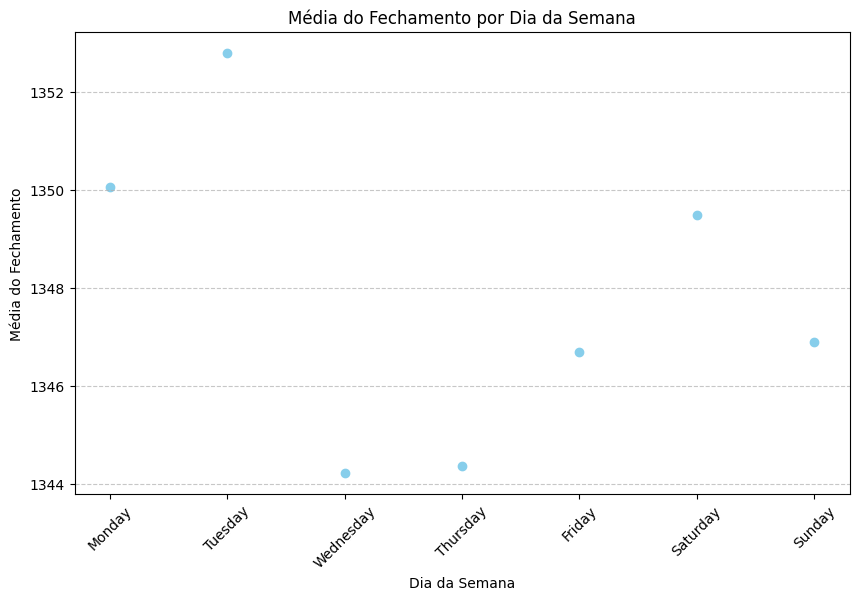

In [6]:
# Converter a coluna de data para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extrair o dia da semana
df['Dia_da_Semana'] = df['Date'].dt.day_name()

# Calcular a média dos valores (por exemplo, Close) para cada dia da semana
media_por_dia_da_semana = df.groupby('Dia_da_Semana')['Close'].mean()

# Definir a ordem dos dias da semana
ordem_dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar o índice de acordo com a ordem desejada
media_por_dia_da_semana = media_por_dia_da_semana.reindex(ordem_dias_da_semana)

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(media_por_dia_da_semana.index, media_por_dia_da_semana.values, color='skyblue')
plt.title('Média do Fechamento por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média do Fechamento')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

In [7]:
import pandas as pd

# Assuming you already have the DataFrame df with the columns 'Date', 'Name', and 'Close'

# Sort the DataFrame by name and date
df = df.sort_values(by=['Name', 'Date'])

# Calculate daily returns
df['Daily_Return'] = df.groupby('Name')['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Calculate the final cumulative return for each cryptocurrency
final_cumulative_returns = df.groupby('Name')['Cumulative_Return'].last()

# Identify the best-performing cryptocurrency
best_performing_crypto = final_cumulative_returns.idxmax()

print(f'A criptomoeda mais interessante em relação à valorização foi: {best_performing_crypto}')

A criptomoeda mais interessante em relação à valorização foi: Ethereum


6.  Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

In [8]:
import pandas as pd

# Supondo que você já tenha o DataFrame df com as colunas 'Date', 'Name', 'Close'

# Sortear o DataFrame por nome e data
df = df.sort_values(by=['Name', 'Date'])

# Calcular os retornos diários
df['Daily_Return'] = df.groupby('Name')['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Calcular o retorno acumulado final para cada criptomoeda
final_cumulative_returns = df.groupby('Name')['Cumulative_Return'].last()

# Identificar a criptomoeda menos interessante
least_interesting_crypto = final_cumulative_returns.idxmin()

print(f'A criptomoeda menos interessante em relação à valorização foi: {least_interesting_crypto}')

A criptomoeda menos interessante em relação à valorização foi: Aave


7. Existe correlação entre os valores para todas as criptomoedas?

In [9]:
import pandas as pd

df = df.sort_values(by=['Name', 'Date'])

# Pivotando o DataFrame para ter 'Symbol' como índice e 'Close' como valores
pivot_df = df.pivot(index='Date', columns='Symbol', values='Close')

# Calculando a matriz de correlação
correlation_matrix = pivot_df.corr()

# Imprimindo a matriz de correlação
print("Matriz de Correlação entre Criptomoedas:")
print(correlation_matrix)

Matriz de Correlação entre Criptomoedas:
Symbol      AAVE       ADA      ATOM       BNB       BTC       CRO      DOGE  \
Symbol                                                                         
AAVE    1.000000  0.839792  0.907634  0.774158  0.877041  0.606600  0.609485   
ADA     0.839792  1.000000  0.899815  0.893322  0.855017  0.616036  0.830919   
ATOM    0.907634  0.899815  1.000000  0.902092  0.937844  0.688902  0.706766   
BNB     0.774158  0.893322  0.902092  1.000000  0.856401  0.625584  0.889387   
BTC     0.877041  0.855017  0.937844  0.856401  1.000000  0.669825  0.648206   
CRO     0.606600  0.616036  0.688902  0.625584  0.669825  1.000000  0.427782   
DOGE    0.609485  0.830919  0.706766  0.889387  0.648206  0.427782  1.000000   
EOS     0.737519  0.306933  0.591838  0.152798  0.117230  0.328249  0.173600   
ETH     0.868677  0.960793  0.907322  0.904260  0.904147  0.608807  0.837741   
LINK    0.919572  0.810504  0.926709  0.869329  0.933915  0.739518  0.730575   

8. Qual a volatilidade de cada moeda?


Níveis médios de volatilidade para cada criptomoeda (em porcentagem):
Name
Aave               13.41%
Binance Coin        8.89%
Bitcoin             4.98%
Cardano             9.22%
Chainlink          11.16%
Cosmos              9.89%
Crypto.com Coin     8.76%
Dogecoin             8.9%
EOS                 8.94%
Ethereum            7.67%
Name: Volatilidade, dtype: object


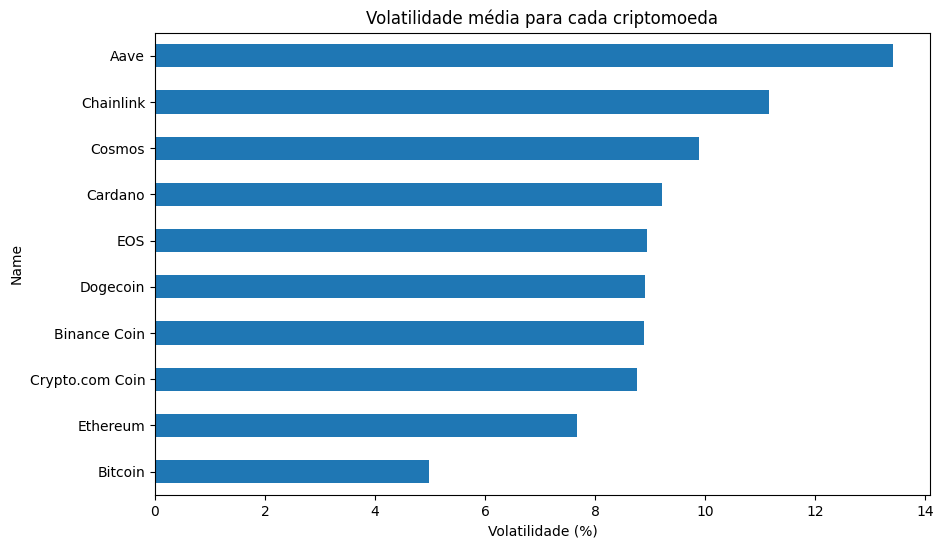

In [10]:
# Calcula a volatilidade para cada criptomoeda
# Multiplica por 100 para se tornar porcentagem
df['Volatilidade'] = (df['High'] - df['Low']) / df['Open']
volatilidade = df.groupby('Name')['Volatilidade'].mean() * 100

# Mantém apenas duas casas decimais após a vírgula
volatilidade = volatilidade.round(2)

# Adiciona o símbolo de porcentagem ao output
volatilidade = volatilidade.apply(lambda x: f'{x}%')

print("\nNíveis médios de volatilidade para cada criptomoeda (em porcentagem):")
print(volatilidade)

# Plota um gráfico para a volatilidade
#Remove o símbolo de porcentagem para plotar
volatilidade = volatilidade.str.rstrip('%').astype('float')
volatilidade.sort_values().plot(kind='barh', figsize=(10, 6))
plt.xlabel('Volatilidade (%)')
plt.title('Volatilidade média para cada criptomoeda')
plt.show()

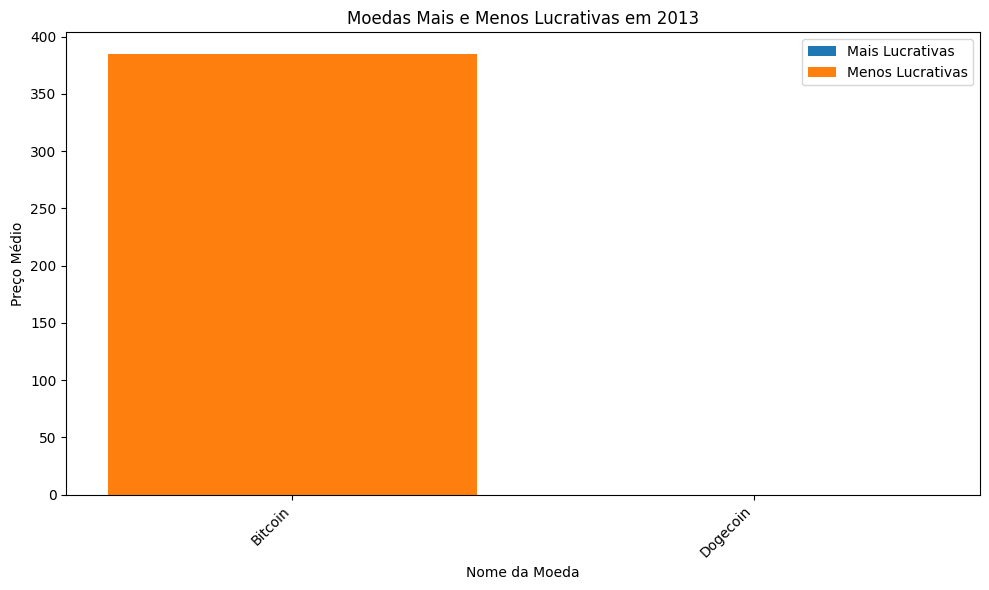

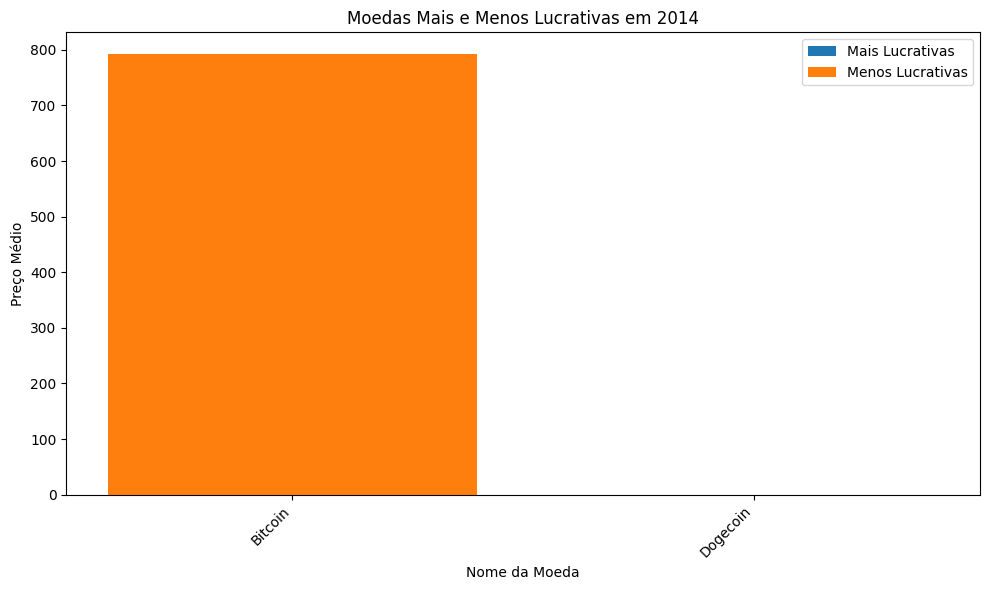

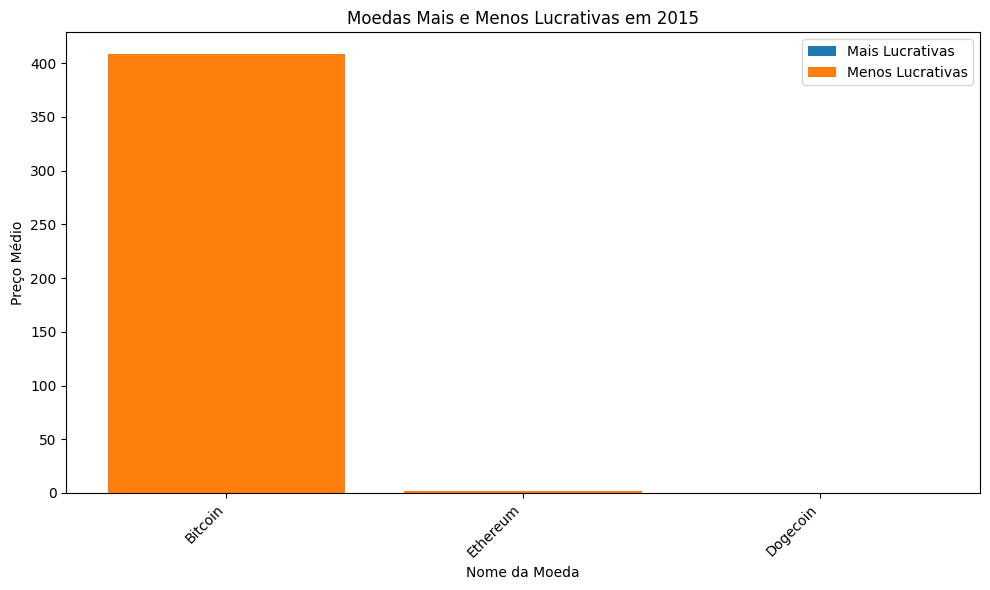

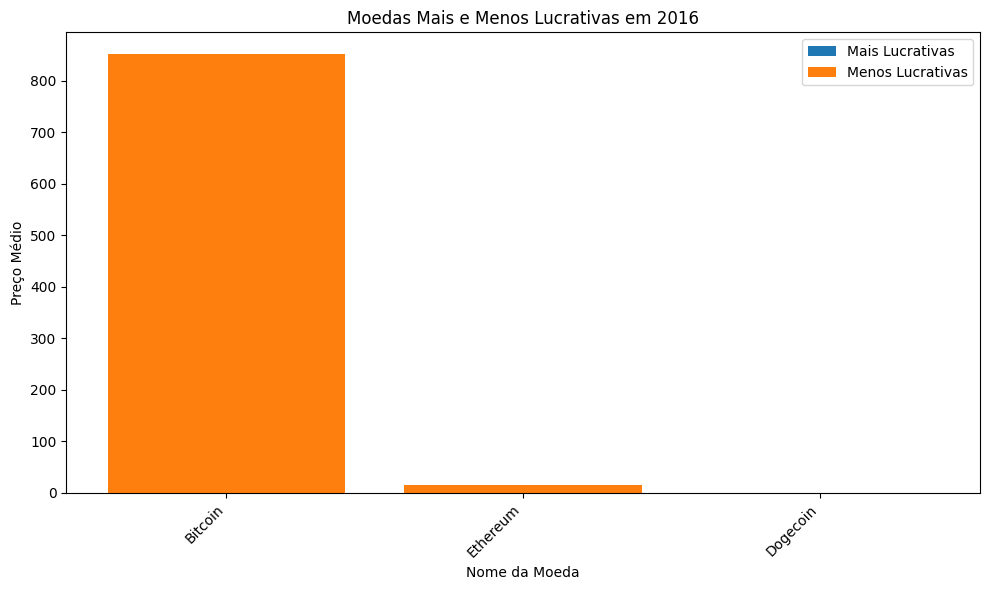

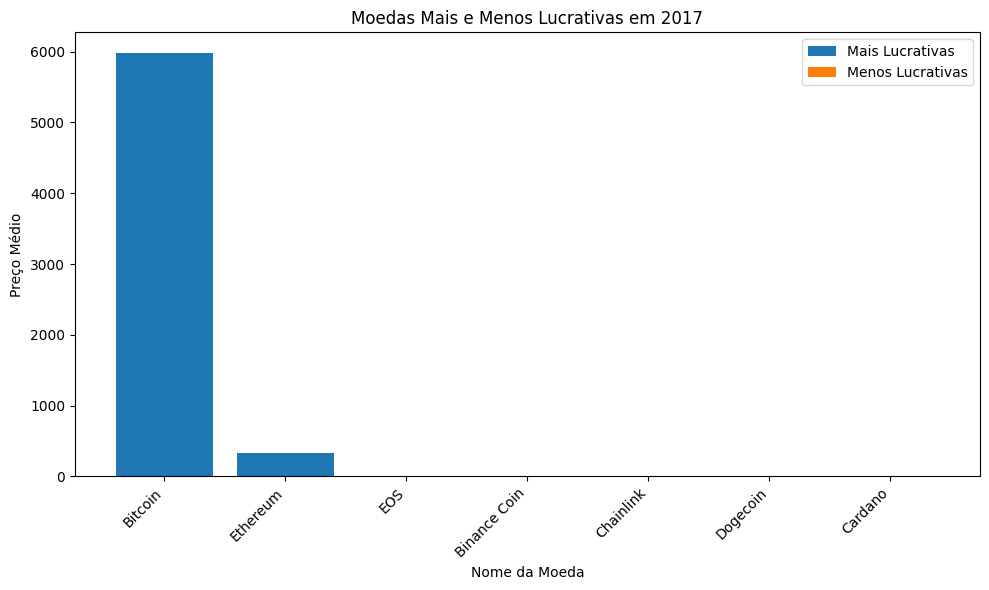

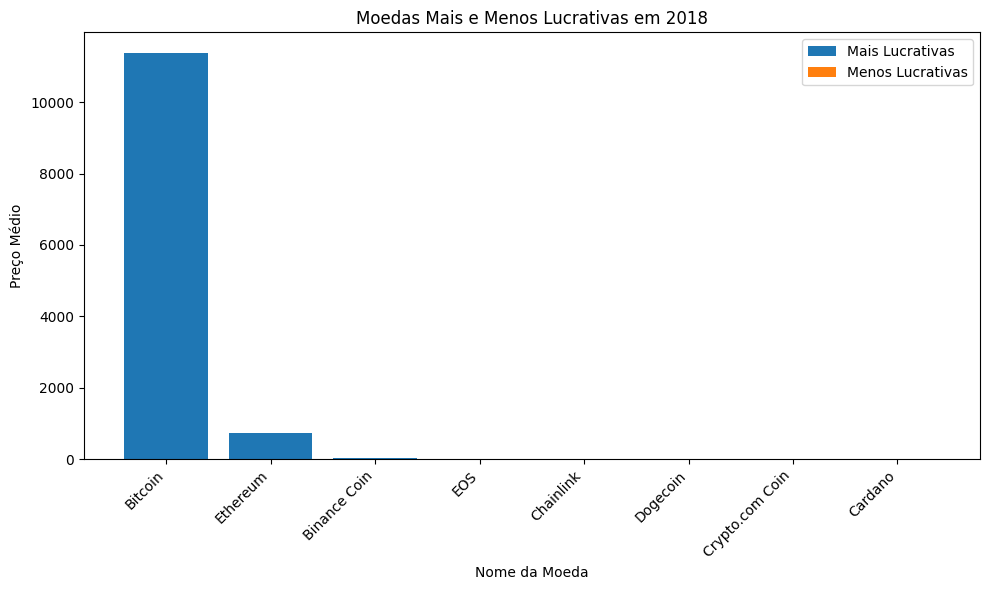

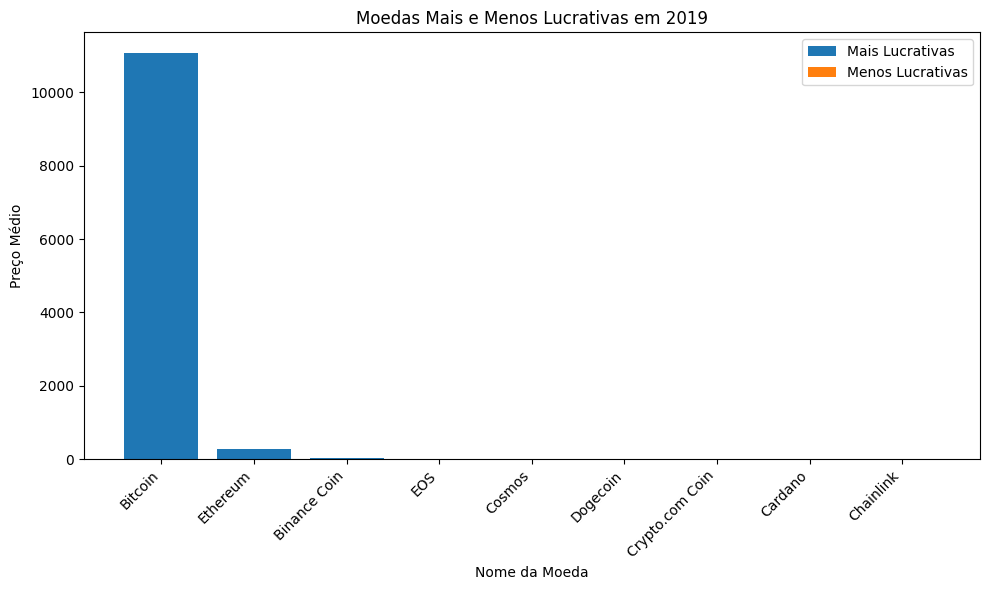

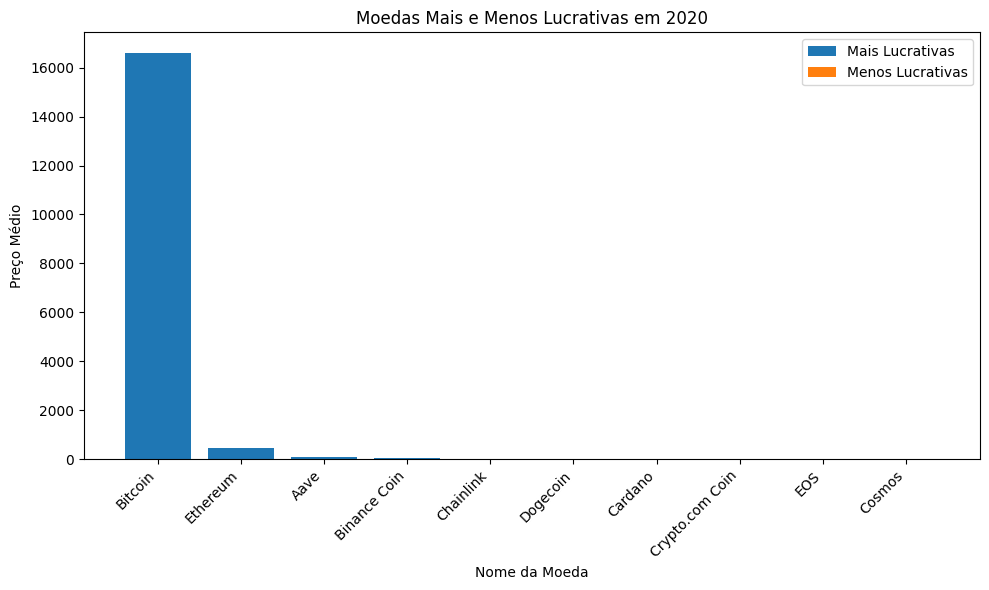

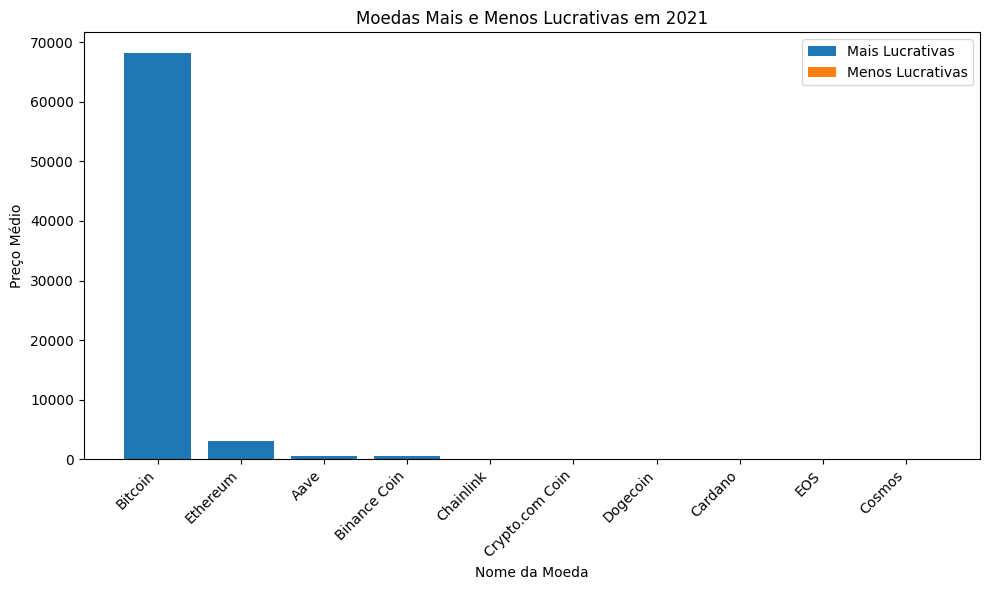

In [11]:
# Corrigir a coluna de nome da moeda
df.rename(columns={'Name': 'Coin Name'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Calcular o preço com base em outras colunas (substitua por seu cálculo real)
df['Price'] = df['Open'] + df['Close'] / 2

# Criar um novo DataFrame com o ano, nome da moeda e a média da coluna 'Preço' para cada ano
df_year = df.groupby([df['Date'].dt.year, df['Coin Name']])['Price'].mean().reset_index()

# Definir o número de moedas top e bottom
top_n = 5

# Loop para plotar gráficos por ano
for year in df_year['Date'].unique():
    # Filtrar dados do ano
    df_year_filtered = df_year.loc[df_year['Date'] == year]

    # Ordenar o DataFrame pela coluna 'Preço'
    df_year_top = df_year_filtered.sort_values(by='Price', ascending=False).head(top_n)
    df_year_bottom = df_year_filtered.sort_values(by='Price', ascending=True).head(top_n)

    # Criar um gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(df_year_top['Coin Name'], df_year_top['Price'], label='Mais Lucrativas')
    plt.bar(df_year_bottom['Coin Name'], df_year_bottom['Price'], label='Menos Lucrativas')

    # Adicionar rótulos e título
    plt.xlabel('Nome da Moeda')
    plt.ylabel('Preço Médio')
    plt.title(f'Moedas Mais e Menos Lucrativas em {year}')

    # Adicionar legenda e mostrar o gráfico
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.tight_layout()
    plt.show()